In [6]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

In [9]:
vaccine = pd.read_csv('h1n1_vaccine_prediction.csv')
vaccine.head()

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,dr_recc_h1n1_vacc,dr_recc_seasonal_vacc,chronic_medic_condition,cont_child_undr_6_mnths,is_health_worker,has_health_insur,is_h1n1_vacc_effective,is_h1n1_risky,sick_from_h1n1_vacc,is_seas_vacc_effective,is_seas_risky,sick_from_seas_vacc,age_bracket,qualification,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,2.0,2.0,1.0,2.0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,4.0,4.0,4.0,2.0,4.0,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City",0.0,0.0,0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,0.0,0.0,NaN,3.0,1.0,1.0,4.0,1.0,2.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City",2.0,0.0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,NaN,3.0,3.0,5.0,5.0,4.0,1.0,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,"MSA, Principle City",0.0,0.0,0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,3.0,2.0,3.0,1.0,4.0,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",1.0,0.0,0


In [10]:
vaccine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   unique_id                  26707 non-null  int64  
 1   h1n1_worry                 26615 non-null  float64
 2   h1n1_awareness             26591 non-null  float64
 3   antiviral_medication       26636 non-null  float64
 4   contact_avoidance          26499 non-null  float64
 5   bought_face_mask           26688 non-null  float64
 6   wash_hands_frequently      26665 non-null  float64
 7   avoid_large_gatherings     26620 non-null  float64
 8   reduced_outside_home_cont  26625 non-null  float64
 9   avoid_touch_face           26579 non-null  float64
 10  dr_recc_h1n1_vacc          24547 non-null  float64
 11  dr_recc_seasonal_vacc      24547 non-null  float64
 12  chronic_medic_condition    25736 non-null  float64
 13  cont_child_undr_6_mnths    25887 non-null  flo

In [11]:
vaccine.shape

(26707, 34)

In [12]:
vaccine.dtypes.value_counts()

float64    23
object      9
int64       2
Name: count, dtype: int64

In [13]:
vaccine.columns

Index(['unique_id', 'h1n1_worry', 'h1n1_awareness', 'antiviral_medication',
       'contact_avoidance', 'bought_face_mask', 'wash_hands_frequently',
       'avoid_large_gatherings', 'reduced_outside_home_cont',
       'avoid_touch_face', 'dr_recc_h1n1_vacc', 'dr_recc_seasonal_vacc',
       'chronic_medic_condition', 'cont_child_undr_6_mnths',
       'is_health_worker', 'has_health_insur', 'is_h1n1_vacc_effective',
       'is_h1n1_risky', 'sick_from_h1n1_vacc', 'is_seas_vacc_effective',
       'is_seas_risky', 'sick_from_seas_vacc', 'age_bracket', 'qualification',
       'race', 'sex', 'income_level', 'marital_status', 'housing_status',
       'employment', 'census_msa', 'no_of_adults', 'no_of_children',
       'h1n1_vaccine'],
      dtype='object')

In [14]:
vaccine.drop(['unique_id'], inplace = True, axis = 1)
vaccine.isnull().sum()

h1n1_worry                      92
h1n1_awareness                 116
antiviral_medication            71
contact_avoidance              208
bought_face_mask                19
wash_hands_frequently           42
avoid_large_gatherings          87
reduced_outside_home_cont       82
avoid_touch_face               128
dr_recc_h1n1_vacc             2160
dr_recc_seasonal_vacc         2160
chronic_medic_condition        971
cont_child_undr_6_mnths        820
is_health_worker               804
has_health_insur             12274
is_h1n1_vacc_effective         391
is_h1n1_risky                  388
sick_from_h1n1_vacc            395
is_seas_vacc_effective         462
is_seas_risky                  514
sick_from_seas_vacc            537
age_bracket                      0
qualification                 1407
race                             0
sex                              0
income_level                  4423
marital_status                1408
housing_status                2042
employment          

In [15]:
vaccine['h1n1_worry'].unique()

array([ 1.,  3.,  2.,  0., nan])

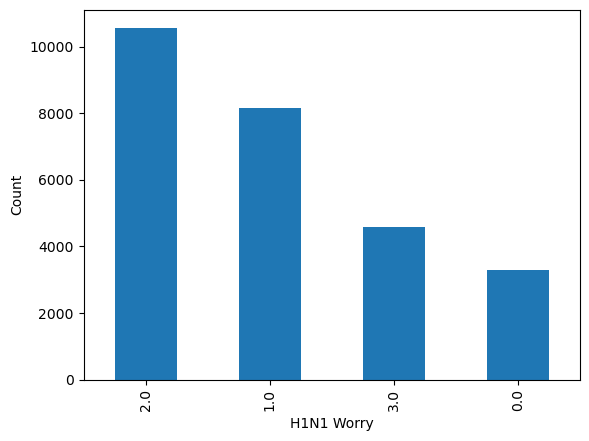

In [16]:
vaccine['h1n1_worry'].value_counts().plot(kind = 'bar')
plt.xlabel('H1N1 Worry')
plt.ylabel('Count')
plt.show()

In [17]:
display(vaccine['h1n1_worry'].mode(), vaccine['h1n1_worry'].median())

0    2.0
Name: h1n1_worry, dtype: float64

2.0

In [18]:
vaccine['h1n1_worry'].fillna(vaccine['h1n1_worry'].mode()[0], inplace = True)

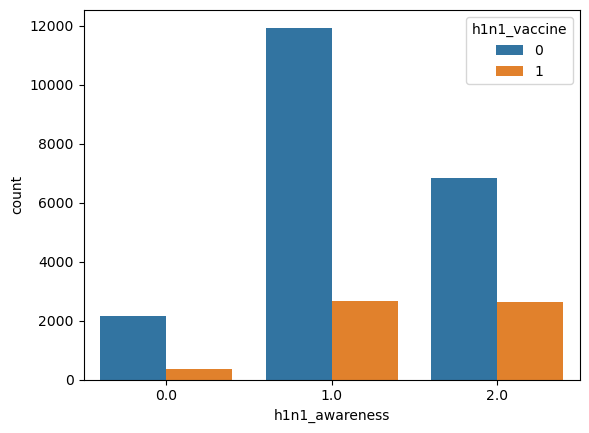

In [19]:
vaccine['h1n1_awareness'].unique()
sns.countplot(x = 'h1n1_awareness', data = vaccine, hue = 'h1n1_vaccine')
plt.show()

In [20]:
vaccine['h1n1_awareness'].mode()

0    1.0
Name: h1n1_awareness, dtype: float64

In [21]:
vaccine['h1n1_awareness'].fillna(vaccine['h1n1_awareness'].mode()[0], inplace = True)
vaccine['antiviral_medication'].unique()
# 0=no, 1=yes

array([ 0.,  1., nan])

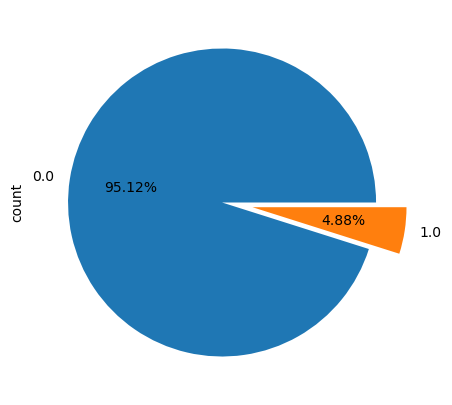

In [22]:
vaccine['antiviral_medication'].value_counts().plot(kind = 'pie', autopct = '%0.2f%%', figsize = [5,5], explode = [0,0.2])
plt.show()

In [23]:
display(vaccine['antiviral_medication'].mode())
# missing 71 missing values by mode
vaccine['antiviral_medication'].fillna(vaccine['antiviral_medication'].mode()[0], inplace = True)

vaccine['contact_avoidance'].unique()
# 0=no, 1=yes
vaccine['contact_avoidance'].value_counts()

0    0.0
Name: antiviral_medication, dtype: float64

contact_avoidance
1.0    19228
0.0     7271
Name: count, dtype: int64

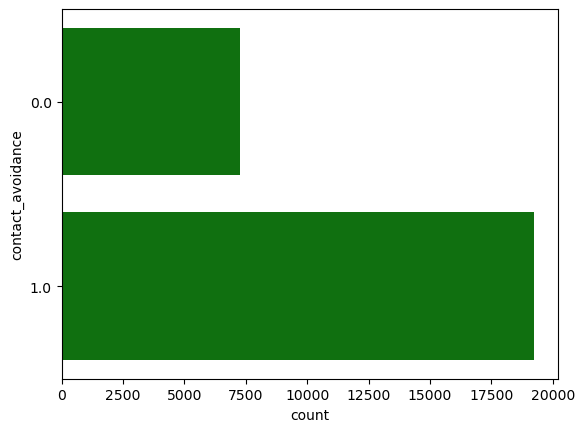

In [24]:
sns.countplot(y = 'contact_avoidance', data = vaccine, color = 'green')
plt.show()

In [25]:
# filling 208 missing values by mode
vaccine['contact_avoidance'].fillna(vaccine['contact_avoidance'].mode()[0], inplace = True)
vaccine['bought_face_mask'].unique()
# 0=no, 1=yes

array([ 0.,  1., nan])

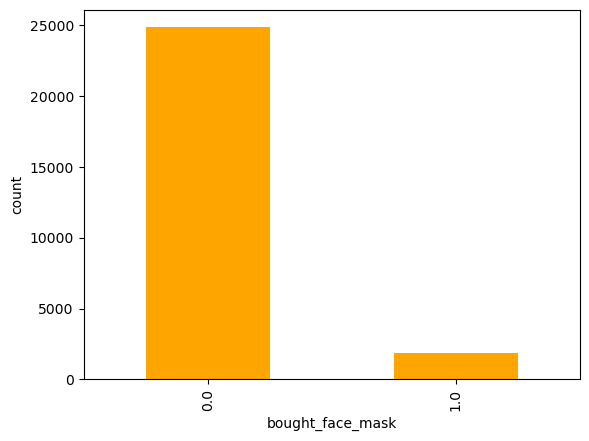

In [26]:
vaccine['bought_face_mask'].value_counts().plot(kind = 'bar', color = 'orange')
plt.xlabel('bought_face_mask')
plt.ylabel('count')
plt.show()

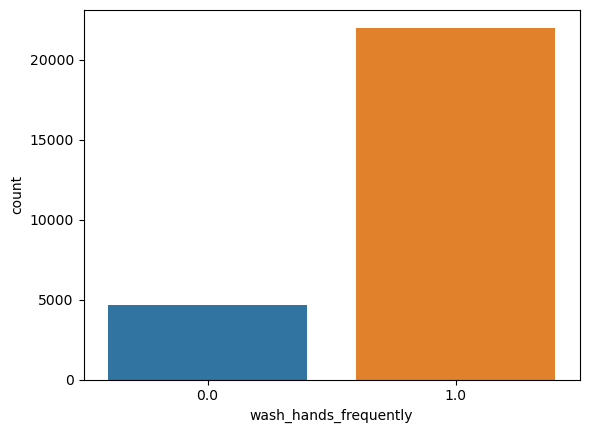

In [27]:
vaccine['bought_face_mask'].fillna(vaccine['bought_face_mask'].mode()[0], inplace = True)
vaccine['wash_hands_frequently'].unique()
# 0-Washes hands frequently, 1=uses hand sanitizer -

sns.countplot(x = 'wash_hands_frequently', data = vaccine)
plt.show()

In [28]:
# filling 42 missing values by mode
vaccine['wash_hands_frequently'].fillna(vaccine['wash_hands_frequently'].mode()[0], inplace = True)
vaccine['avoid_large_gatherings'].unique()
# 0=no, 1=yes
vaccine['avoid_large_gatherings'].value_counts()

avoid_large_gatherings
0.0    17073
1.0     9547
Name: count, dtype: int64

In [29]:
vaccine['avoid_large_gatherings'].fillna(vaccine['avoid_large_gatherings'].mode()[0], inplace = True)
vaccine['reduced_outside_home_cont'].unique()
# 0=no, 1=yes
vaccine['reduced_outside_home_cont'].value_counts()

reduced_outside_home_cont
0.0    17644
1.0     8981
Name: count, dtype: int64

In [30]:
vaccine['reduced_outside_home_cont'].fillna(vaccine['reduced_outside_home_cont'].mode()[0], inplace = True)
vaccine['avoid_touch_face'].unique()
# 0=no, 1=yes
vaccine['avoid_touch_face'].value_counts()

avoid_touch_face
1.0    18001
0.0     8578
Name: count, dtype: int64

In [31]:
vaccine['avoid_touch_face'].fillna(vaccine['avoid_touch_face'].mode()[0], inplace = True)
display(vaccine['dr_recc_h1n1_vacc'].unique(), vaccine['dr_recc_seasonal_vacc'].unique())
# 0=no, 1=yes

array([ 0., nan,  1.])

array([ 0., nan,  1.])

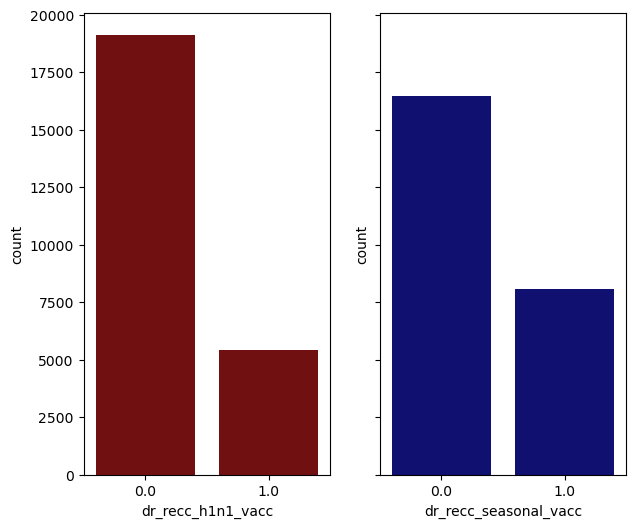

In [32]:
fig, ax = plt.subplots(1,2, figsize = [7,6], sharey = True )
sns.countplot(x = 'dr_recc_h1n1_vacc', data = vaccine, color = 'maroon', ax=ax[0])
sns.countplot(x = 'dr_recc_seasonal_vacc', data = vaccine, color = 'navy', ax=ax[1])
plt.show()

In [33]:
vaccine['dr_recc_h1n1_vacc'].fillna(vaccine['dr_recc_h1n1_vacc'].mode()[0], inplace = True)
vaccine['dr_recc_seasonal_vacc'].fillna(vaccine['dr_recc_seasonal_vacc'].mode()[0], inplace = True)
vaccine['chronic_medic_condition'].value_counts()

chronic_medic_condition
0.0    18446
1.0     7290
Name: count, dtype: int64

<Axes: ylabel='cont_child_undr_6_mnths'>

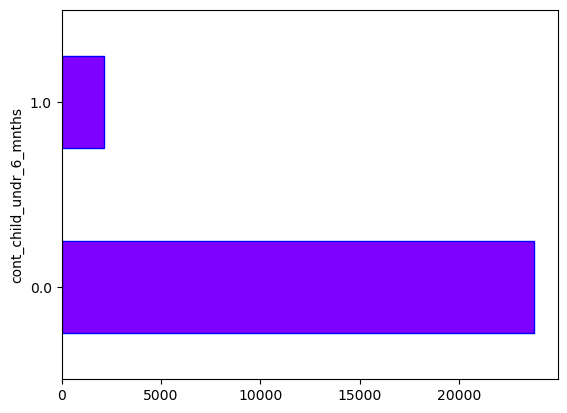

In [34]:
vaccine['chronic_medic_condition'].fillna(vaccine['chronic_medic_condition'].mode()[0], inplace = True)
vaccine['cont_child_undr_6_mnths'].value_counts().plot(kind = 'barh', cmap = 'rainbow', edgecolor = 'b')

In [35]:
vaccine['cont_child_undr_6_mnths'].fillna(vaccine['cont_child_undr_6_mnths'].mode()[0], inplace = True)
vaccine['is_health_worker'].value_counts()

is_health_worker
0.0    23004
1.0     2899
Name: count, dtype: int64

<Axes: ylabel='has_health_insur'>

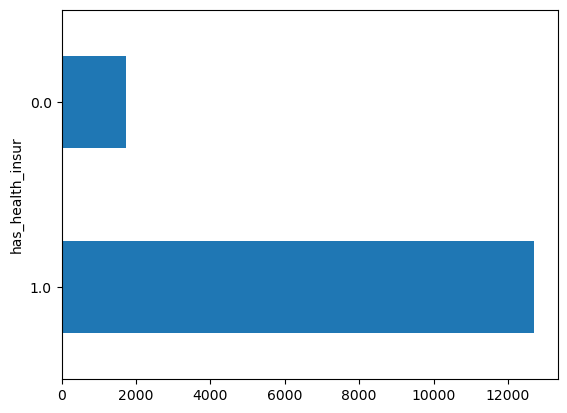

In [36]:
vaccine['is_health_worker'].fillna(vaccine['is_health_worker'].mode()[0], inplace = True)
vaccine['has_health_insur'].unique()
# 0=no, 1=yes
vaccine['has_health_insur'].value_counts().plot(kind = 'barh')

<Axes: ylabel='has_health_insur'>

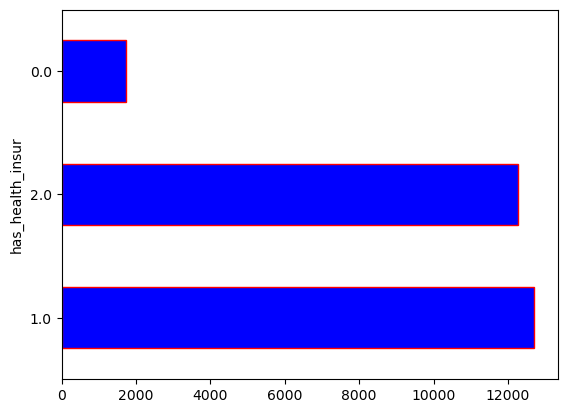

In [37]:
vaccine['has_health_insur'].fillna(2.0, inplace = True)
vaccine['has_health_insur'].value_counts().plot(kind = 'barh', color = 'b', edgecolor = 'r')

In [38]:
display(vaccine['is_h1n1_vacc_effective'].unique(), vaccine['is_seas_vacc_effective'].unique())

array([ 3.,  5.,  4.,  2.,  1., nan])

array([ 2.,  4.,  5.,  3.,  1., nan])

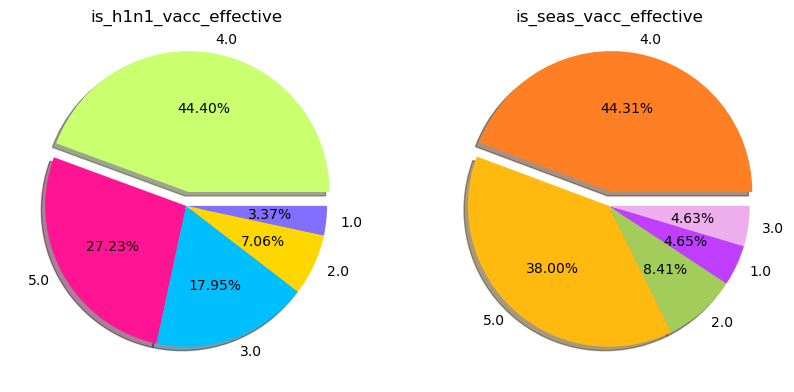

In [39]:
colors = ['#CAFF70', '#FF1493', '#00BFFF', '#FFD700', '#836FFF']
colors1 = ['#FF7F24', '#FFB90F', '#A2CD5A', '#BF3EFF', '#EEAEEE']
fig, (ax1,ax2) = plt.subplots(1,2, figsize = [10,10])

ax1.pie(vaccine['is_h1n1_vacc_effective'].value_counts(), labels = vaccine['is_h1n1_vacc_effective'].value_counts().index , 
        autopct = '%0.2f%%', explode= [0.1,0,0,0,0], colors = colors, shadow = True)

ax2.pie(vaccine['is_seas_vacc_effective'].value_counts(), labels = vaccine['is_seas_vacc_effective'].value_counts().index , 
        autopct = '%0.2f%%', explode= [0.1,0,0,0,0], colors = colors1, shadow = True)

ax1.set_title('is_h1n1_vacc_effective')
ax2.set_title('is_seas_vacc_effective')

plt.show()

In [40]:
vaccine['is_h1n1_vacc_effective'].fillna(vaccine['is_h1n1_vacc_effective'].mode()[0], inplace = True)
vaccine['is_seas_vacc_effective'].fillna(vaccine['is_seas_vacc_effective'].mode()[0], inplace = True)
display(vaccine['is_h1n1_risky'].unique(), vaccine['is_seas_risky'].unique())

array([ 1.,  4.,  3.,  2.,  5., nan])

array([ 1.,  2.,  4.,  3.,  5., nan])

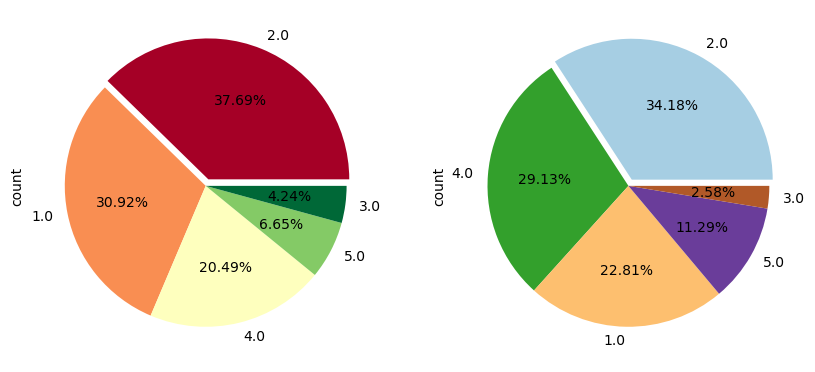

In [41]:
fig, ax = plt.subplots(1, 2, figsize = [10,10])
vaccine['is_h1n1_risky'].value_counts().plot(kind = 'pie', autopct = '%0.2f%%', explode = [0.05,0,0,0,0], cmap = 'RdYlGn', ax = ax[0])
vaccine['is_seas_risky'].value_counts().plot(kind = 'pie', autopct = '%0.2f%%', explode = [0.05,0,0,0,0], cmap = 'Paired', ax = ax[1])
plt.show()

In [42]:
vaccine['is_h1n1_risky'].fillna(vaccine['is_h1n1_risky'].mode()[0], inplace = True)
vaccine['is_seas_risky'].fillna(vaccine['is_seas_risky'].mode()[0], inplace = True)
display(vaccine['sick_from_h1n1_vacc'].unique(), vaccine['sick_from_seas_vacc'].unique())

array([ 2.,  4.,  1.,  5.,  3., nan])

array([ 2.,  4.,  1.,  5., nan,  3.])

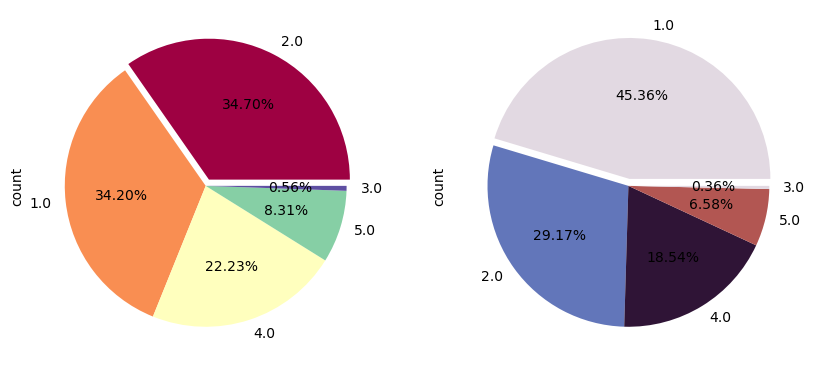

In [43]:
fig, ax = plt.subplots(1,2, figsize = [10,10])
vaccine['sick_from_h1n1_vacc'].value_counts().plot(kind = 'pie', autopct = '%0.2f%%', explode = [0.05,0,0,0,0], cmap = 'Spectral', ax = ax[0])
vaccine['sick_from_seas_vacc'].value_counts().plot(kind = 'pie', autopct = '%0.2f%%', explode = [0.05,0,0,0,0], cmap = 'twilight', ax = ax[1])
plt.show()

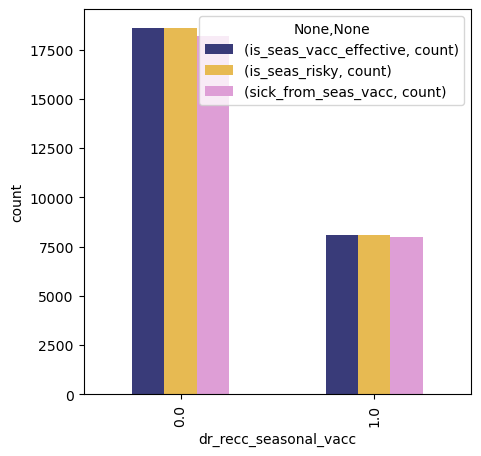

In [44]:
vaccine.groupby(['dr_recc_seasonal_vacc']).agg({'is_seas_vacc_effective' : ['count'],
                                      'is_seas_risky' :['count'],
                                      'sick_from_seas_vacc' : ['count']}).plot(kind = 'bar', cmap = 'tab20b', figsize = [5,5])
plt.ylabel('count')
plt.show()

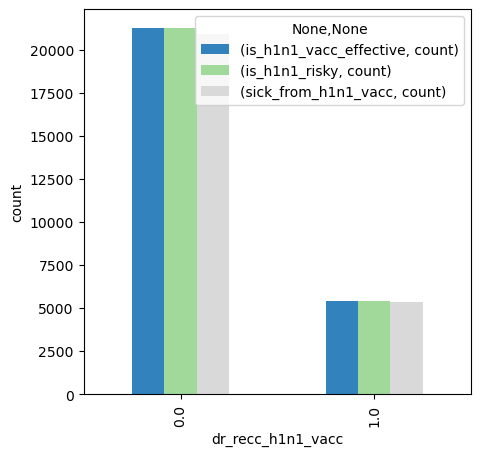

In [45]:
vaccine.groupby(['dr_recc_h1n1_vacc']).agg({'is_h1n1_vacc_effective' : ['count'],
                                      'is_h1n1_risky' :['count'],
                                      'sick_from_h1n1_vacc' : ['count']}).plot(kind = 'bar', cmap = 'tab20c', figsize = [5,5])
plt.ylabel('count')
plt.show()

In [46]:
vaccine.isnull().sum()

h1n1_worry                      0
h1n1_awareness                  0
antiviral_medication            0
contact_avoidance               0
bought_face_mask                0
wash_hands_frequently           0
avoid_large_gatherings          0
reduced_outside_home_cont       0
avoid_touch_face                0
dr_recc_h1n1_vacc               0
dr_recc_seasonal_vacc           0
chronic_medic_condition         0
cont_child_undr_6_mnths         0
is_health_worker                0
has_health_insur                0
is_h1n1_vacc_effective          0
is_h1n1_risky                   0
sick_from_h1n1_vacc           395
is_seas_vacc_effective          0
is_seas_risky                   0
sick_from_seas_vacc           537
age_bracket                     0
qualification                1407
race                            0
sex                             0
income_level                 4423
marital_status               1408
housing_status               2042
employment                   1463
census_msa    

In [47]:
display(vaccine.isna().sum())

h1n1_worry                      0
h1n1_awareness                  0
antiviral_medication            0
contact_avoidance               0
bought_face_mask                0
wash_hands_frequently           0
avoid_large_gatherings          0
reduced_outside_home_cont       0
avoid_touch_face                0
dr_recc_h1n1_vacc               0
dr_recc_seasonal_vacc           0
chronic_medic_condition         0
cont_child_undr_6_mnths         0
is_health_worker                0
has_health_insur                0
is_h1n1_vacc_effective          0
is_h1n1_risky                   0
sick_from_h1n1_vacc           395
is_seas_vacc_effective          0
is_seas_risky                   0
sick_from_seas_vacc           537
age_bracket                     0
qualification                1407
race                            0
sex                             0
income_level                 4423
marital_status               1408
housing_status               2042
employment                   1463
census_msa    

In [53]:

# Importing
import sklearn
from sklearn.datasets import load_diabetes
import pandas as pd
import matplotlib.pyplot as plt
 
# Load the dataset
diabetics = load_diabetes()
 
# Create the dataframe
column_name = diabetics.feature_names
df_diabetics = pd.DataFrame(diabetics.data)
df_diabetics.columns = column_name
print(df_diabetics.head())

        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  
0 -0.002592  0.019907 -0.017646  
1 -0.039493 -0.068332 -0.092204  
2 -0.002592  0.002861 -0.025930  
3  0.034309  0.022688 -0.009362  
4 -0.002592 -0.031988 -0.046641  


In [55]:
vaccine1 = vaccine.astype({'h1n1_worry' : str, 'h1n1_awareness': str, 'antiviral_medication': str,
       'contact_avoidance': str, 'bought_face_mask': str, 'wash_hands_frequently': str,
       'avoid_large_gatherings': str, 'reduced_outside_home_cont': str,
       'avoid_touch_face': str, 'dr_recc_h1n1_vacc': str, 'dr_recc_seasonal_vacc': str,
       'chronic_medic_condition': str, 'cont_child_undr_6_mnths': str,
       'is_health_worker': str, 'has_health_insur': str, 'is_h1n1_vacc_effective': str,
       'is_h1n1_risky': str, 'sick_from_h1n1_vacc': str, 'is_seas_vacc_effective': str, 'age_bracket' : str,
       'is_seas_risky': str, 'sick_from_seas_vacc': str, 'no_of_adults' : str, 'no_of_children' : str,
        'h1n1_vaccine' : str})
vaccine1.dtypes.value_counts()

object    33
Name: count, dtype: int64

In [56]:
vaccine_dummy = pd.get_dummies(vaccine1, drop_first= True )
vaccine_dummy.shape

(26707, 73)

In [57]:
vaccine_dummy['h1n1_vaccine_1'].value_counts(normalize = True)

h1n1_vaccine_1
False    0.787546
True     0.212454
Name: proportion, dtype: float64

In [58]:
y=vaccine_dummy['h1n1_vaccine_1']
x=vaccine_dummy.drop(['h1n1_vaccine_1'], axis=1)
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data['Var'] = x.columns
vif_data['VIF'] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]

C:\Users\anshu\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


In [59]:
vif_data.sort_values(by = ['VIF'], ascending = False)

,Var,VIF
71,no_of_children_nan,inf
67,no_of_adults_nan,inf
41,sick_from_seas_vacc_3.0,0.011576
31,sick_from_h1n1_vacc_nan,0.008647
28,sick_from_h1n1_vacc_3.0,0.007402
...,...,...
63,census_msa_Non-MSA,0.000229
11,avoid_touch_face_1.0,0.000225
62,"census_msa_MSA, Principle City",0.000218
14,chronic_medic_condition_1.0,0.000216


In [60]:
x_train, x_test, y_train , y_test=train_test_split(x,y, test_size=.25, random_state=88)

In [61]:
log = LogisticRegression()

log.fit(x_train,y_train)

print(f"Training Score : {log.score(x_train, y_train)}")
print(f"Testing Score : {log.score(x_test, y_test)}")

Training Score : 0.8553669495756365
Testing Score : 0.8433428186311218
